I am making approximations which are incorrect: firstly, $C_p$ is temperature dependent and should be a function, which will be written and secondly, enthalpies are also temperature dependent. Once a function for $C_p$ has been written the correct enthalpies can be computed using the law of Kirchoff.

In [21]:
using DifferentialEquations
using Plots

# Initial species concentrations 0. T 1. N2, 2. O2, 3. CH4, 4. H2O, 5. CO2
X0 = [1000, 31.9, 8.59, 6.14, 0, 0] # mol/m^3

# Stoichiometry: 2 O2 + CH4 -> 2 H2O + CO2
S = [0, -2, -1, 2, 1]  # N2 does not participate in the reaction

# Molar masses and enthalpies
M = [28.0134, 31.999, 16.04246, 18.01528, 44.01]*1e-3  # kg/mol
h0 = [0, 0, -74.8, -241.8, -393.8]  # kJ/mol

# Specific heat of air
Cp = 1.005  # kJ/kg/K

1.005

In [22]:
# Arrhenius equation for the reaction rate with temperature clamping
function Arrhenius(X)
    T = X[1]

    Y = X[2:end]
    n_CH4 = 1.0
    n_O2 = 0.5
    A = 1.1e10
    Ea = 2e4
    R = 8.314

    k = A * exp(-Ea / (R * T))  # rate constant
    r = k * max(Y[3], 0)^n_CH4 * max(Y[2], 0)^n_O2
    return r
end

Arrhenius(X0)

1.785776513422826e10

In [23]:
# Mixture density based on the species concentrations
function rho(X)
    Y = X[2:end]  # Species concentrations
    return sum(Y .* M)  # Summing weighted by molar mass
end

rho (generic function with 1 method)

In [24]:
# Temperature rate of change due to reaction enthalpy
function dT(X, r)
    summation = sum((r.* S).* M.* h0)
    return -summation / rho(X) / Cp
end

dT (generic function with 1 method)

In [50]:
# Derivative function for the ODE system
function f!(dX, X, p, t)
    r = Arrhenius(X)
    dX[1] = dT(X,r)
    dX[2:end] .= r .* S  # Species concentrations change
end

# Define time span and solve the ODE problem
tend = 1e-9
tspan = (0.0, tend)

# Define and solve the ODE problem with tighter tolerances
problem = ODEProblem(f!, X0, tspan)
sol = solve(problem)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 17-element Vector{Float64}:
 0.0
 2.0830661476203533e-10
 3.252358560815507e-10
 5.138939493527511e-10
 6.583075686489971e-10
 7.51562357243117e-10
 8.205646745212847e-10
 8.642197093043864e-10
 8.793410095194387e-10
 8.886983984915651e-10
 8.949012425019551e-10
 8.983371888406662e-10
 9.019180546844729e-10
 9.052555092525124e-10
 9.093918233176946e-10
 9.507549639695161e-10
 1.0e-9
u: 17-element Vector{Vector{Float64}}:
 [1000.0, 31.9, 8.59, 6.14, 0.0, 0.0]
 [1048.7291205925821, 31.9, 3.5948220878357415, 3.6424110439178707, 4.995177912164258, 2.497588956082129]
 [1062.805873915675, 31.9, 2.1518267023192106, 2.920913351159605, 6.438173297680789, 3.2190866488403946]
 [1075.7405835451234, 31.9, 0.825901121301432, 2.2579505606507158, 7.764098878698568, 3.882049439349284]
 [1080.8664654452534, 31.9, 0.3004515070949874, 1.9952257535474935, 8.2895484929050

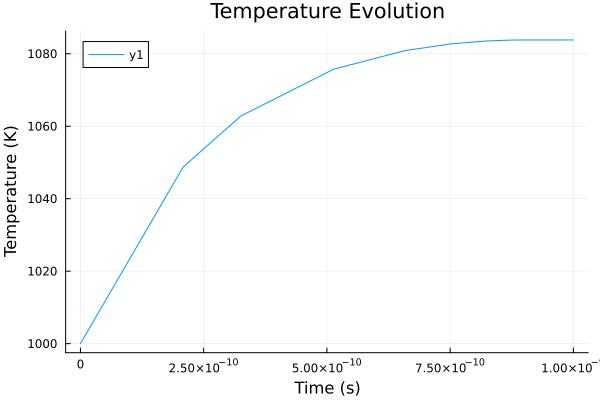

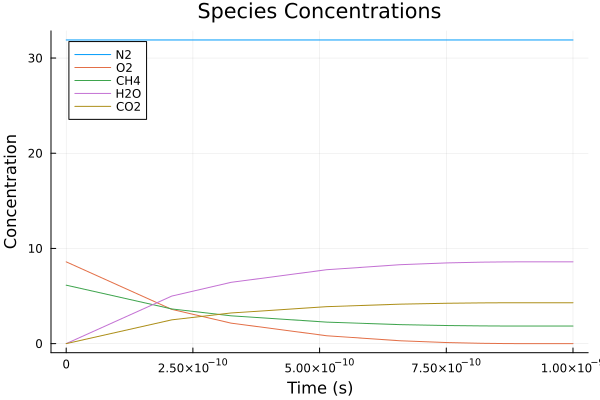

In [56]:
# Extract the solution arrays
t = sol.t
T = sol[1, :]
C = sol[2:end, :]'

# Create a plot for the temperature
plot1 = plot(t, T, xlabel="Time (s)", ylabel="Temperature (K)", title="Temperature Evolution")

display(plot1)

# Create a plot for the species concentrations
plot2 = plot(t, C, xlabel="Time (s)", ylabel="Concentration", title="Species Concentrations", label=["N2" "O2" "CH4" "H2O" "CO2"])

display(plot2)